# Visualization with Altair
[Altair](https://altair-viz.github.io) is a [Vega-Lite](https://vega.github.io/vega-lite/) base visualization library for python.

Based on: https://altair-viz.github.io/user_guide/selections.html

In [4]:
# See https://github.com/plotly/plotly.py and https://plot.ly/python/figurewidget/
import altair as alt

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

import pandas as pd
import numpy as np

In [5]:
#use a standard dataset of heterogenous data
cars = pd.read_csv('data/mtcars.csv')

## Scatterplot

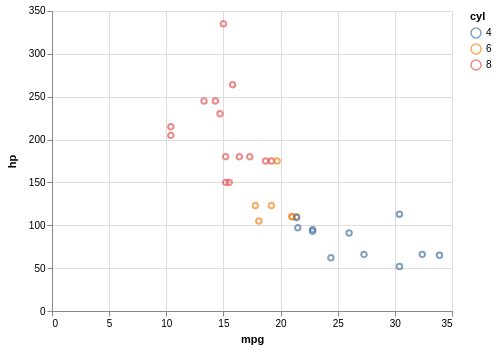

In [8]:
alt.Chart(cars).mark_point().encode(
    x='mpg:Q',
    y='hp:Q',
    color='cyl:N'
)

## Interactivity (Brushing)

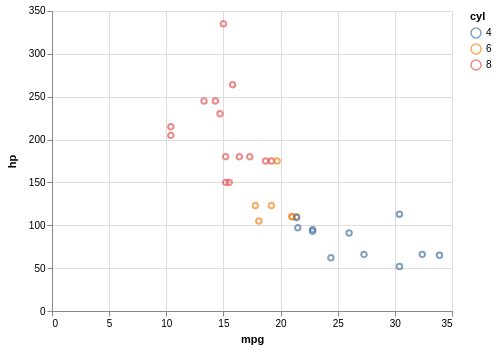

In [13]:
brush = alt.selection_interval()  # selection of type "interval"

alt.Chart(cars).mark_point().encode(
    x='mpg:Q',
    y='hp:Q',
    color=alt.condition(brush, 'cyl:N', alt.value('lightgray')) # unselected become lightgrey
).add_selection(
    brush  # bind this brush to our chart
)

## Linking Charts

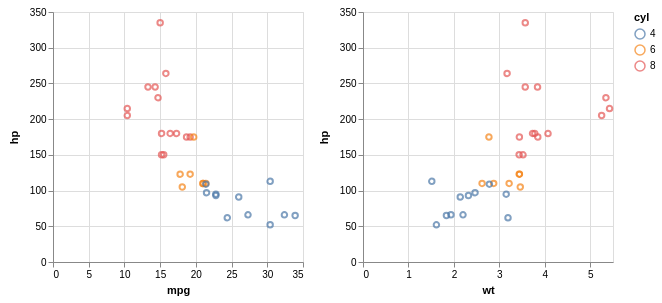

In [16]:
brush = alt.selection_interval(encodings=['x'])

chart = alt.Chart(cars).mark_point().encode(
    y='hp:Q',
    color=alt.condition(brush, 'cyl:N', alt.value('lightgray'))
).properties(
    width=250,
    height=250
).add_selection(
    brush
)

chart.encode(x='mpg:Q')| chart.encode(x='wt:Q')